#A data analysis of the tourism industry in Spain

*Is Spain one of the most populist tourism destinations in the world?*

##Goal

*The goal of this project is to provide insights into Spain's tourism industry from the beginning of the 2000's. The analysis was conducted on a broad range of data that presents numerous charateristics of tourism within Spain. The data techniques used show the contribution of tourism to Spain's economy, the various popular destinations across the country and also which countries have the most tourists that visit Spain. Further more the analysis also shows which season is the most populist to visit Spain and also presents comparisons between foreign and domestic tourists. The results of this study deliver helpful and relevant information to policymakers, businesses and stakeholders to help support making decisions and creating methods to strengthen Spain's tourism industry.* 

Importing the modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set(style="darkgrid")

Statistics of Foreign Tourist Arrivals and Domestic Tourists in Spain [2000 - 2023]

Importing the data

In [7]:
df=pd.read_csv("tourists.csv")
fta_dt=df.copy()
fta_dt.head()

,Year,FTAs in Spain (in million),% - change over previous year,DT in Spain (in million),% - change over the previous year
0,2000,46.4,2.2,14.8,2.1
1,2001,48.6,4.7,15.1,2.0
2,2002,50.3,3.5,17.2,13.9
3,2003,50.9,1.2,17.4,1.2
4,2004,52.4,2.9,18.1,4.0


Renaming and dropping columns

In [11]:
df=pd.read_csv("tourists.csv")
df.rename(columns=({'FTAs in Spain (in million)': 'FTA', 'DT in Spain (in million)': 'DT'}), inplace = True)
df.drop('% - change over previous year',axis=1,inplace=True)
df.drop('% - change over the previous year',axis=1,inplace=True)
df.head()

,Year,FTA,DT
0,2000,46.4,14.8
1,2001,48.6,15.1
2,2002,50.3,17.2
3,2003,50.9,17.4
4,2004,52.4,18.1


Combining columns 'FTA & DT' into a single value column and the column 'variable' will differentiate these values

In [14]:
df.melt(id_vars='Year').rename(columns={'variable': 'Tourists'})

,Year,Tourists,value
0,2000,FTA,46.4
1,2001,FTA,48.6
2,2002,FTA,50.3
3,2003,FTA,50.9
4,2004,FTA,52.4
5,2005,FTA,55.9
6,2006,FTA,58.0
7,2007,FTA,58.7
8,2008,FTA,57.2
9,2009,FTA,52.2


Visualizing the Dataset

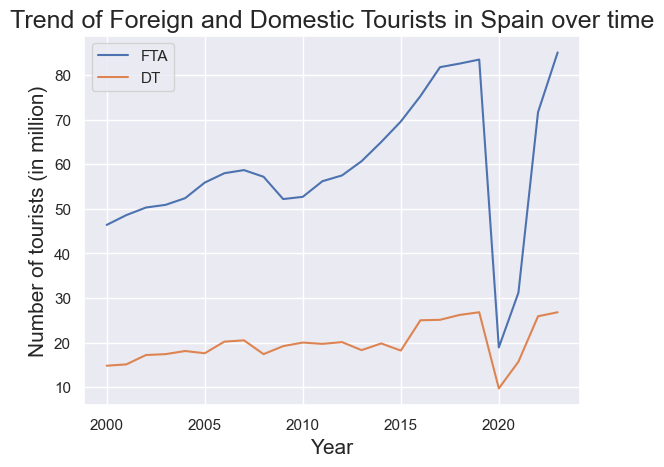

In [17]:
df.plot(x='Year', y=['FTA','DT'], kind='line')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of tourists (in million)', fontsize=15)
plt.title('Trend of Foreign and Domestic Tourists in Spain over time', fontsize=18)
plt.show()

As you can see over the years since the year 2000 the number of foreign tourist arrivals to Spain increases every year up until the year 2008. The number of foreign tourist dropped in this year due to an economic recession in Europe. During 2008 a lot of people lost their jobs and had no money, which meant not many people travelled abroad on holiday, which resulted in Spains tourism industry becoming damaged and loosing profit from tourists. You can also see that the number of foreign tourists did not improve the following year and decreased even more as still alot of people had not yet recovered from the recession. Wheras domestic tourism increased in 2009. This was due to more Spanish residents taking their holidays within Spain and not travelling abroad. By the following year in 2010 you can see that the quantity of foreign tourists starts to creep up and keeps climbing higher until the year 2020 when Covid hit. Due to Covid, no tourism was allowed and people could only fly for certain reasons such as medical or work, etc. The year 2020 is probably one of the worst years Spain has ever seen in terms of tourism with only receiving 18.9 million foreign arrivals, however the country managed to survive without the extra profits from tourism including the Spanish islands for example Ibiza, were 84% of their income, comes from tourism. 

Quarterly distribution of tourists [2005 - 2023]

Overall foreign arrivals [2005-2023]

Composing the dataset

In [22]:
import pandas as pd
quarterly=pd.read_csv("Spain-tourism-statistics-2005-2023-quarterly.csv").copy().rename(columns={
    '% - Distribution by quarter - 1st quarter (Jan-Mar)':'1st Quarter',
    '% - Distribution by quarter - 2nd quarter (Apr-Jun)':'2nd Quarter',
    '% - Distribution by quarter - 3rd quarter (Jul-Sep)':'3rd Quarter',
    '% - Distribution by quarter - 4th quarter (Oct-Dec)':'4th Quarter',
})
quarterly.head()

,Year,Arrivals,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
0,2005,55877317,20.2,23.0,31.3,25.5
1,2006,58089166,20.3,24.2,31.5,25.5
2,2007,58592157,21.4,24.1,30.2,19.8
3,2008,57229365,21.7,24.3,31.0,19.0
4,2009,52186339,18.2,21.8,32.5,17.5


Shortening the Dataframe and shifting the decimal point of the 'Arrivals' value column 6 digits to the left and rounding up to 2 decimal points

In [25]:
tot_arrivals=quarterly[['Year','Arrivals']].copy()
tot_arrivals["Arrivals"]=tot_arrivals['Arrivals']*(10**-6)
tot_arrivals=tot_arrivals.round(decimals=2)
tot_arrivals.head()

,Year,Arrivals
0,2005,55.88
1,2006,58.09
2,2007,58.59
3,2008,57.23
4,2009,52.19


Visualization of the Data Set

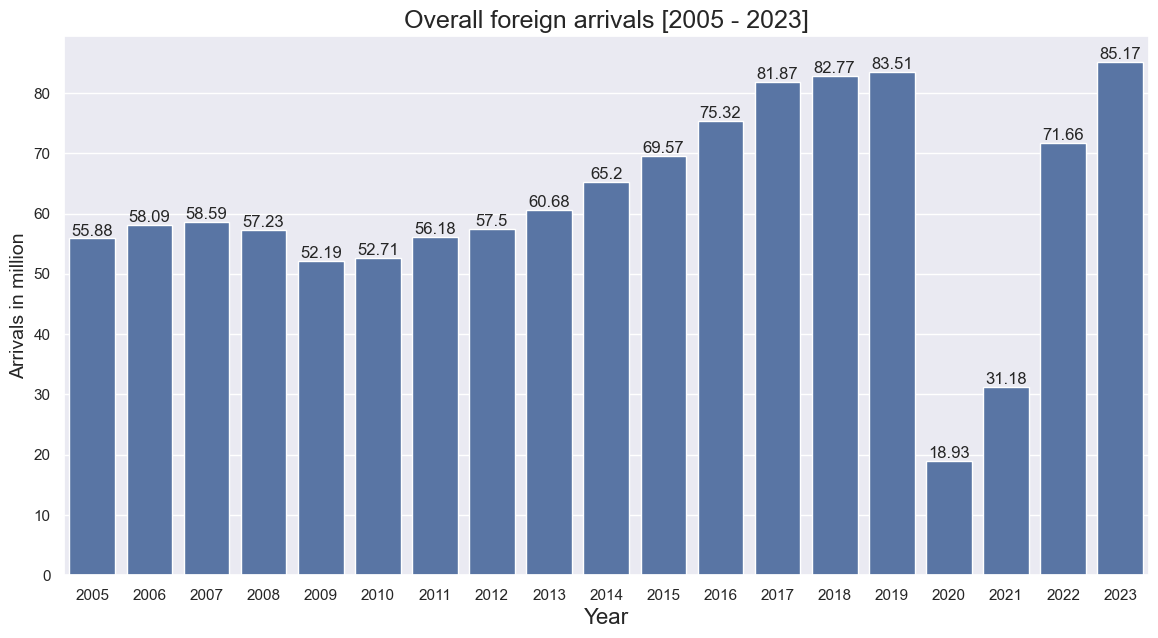

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

g=sns.barplot(x=tot_arrivals['Year'], y=tot_arrivals["Arrivals"])

plt.title("Overall foreign arrivals [2005 - 2023]", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Arrivals in million", fontsize=14)

g.bar_label(g.containers[0], fontsize=12)
    
plt.show()

As the graph displays you can see that tourism in Spain advances each year apart from (2008,2009,2020,2021) due to a economic recession and Covid-19.

Quarterly distribution of FTAs during 2010, 2011 and 2012

In [30]:
quarterly2010=quarterly[quarterly['Year']==2010].copy()
quarterly2010=quarterly2010.drop(['Arrivals', 'Year'], axis=1)

quarterly2011=quarterly[quarterly['Year']==2011].copy()
quarterly2011=quarterly2011.drop(['Arrivals', 'Year'], axis=1)

quarterly2012=quarterly[quarterly['Year']==2012].copy()
quarterly2012=quarterly2012.drop(['Arrivals', 'Year'], axis=1)

In [31]:
quarterly2010.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
5,18.6,25.4,34.7,25.3


In [32]:
quarterly2011.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
6,20.1,24.1,30.0,25.8


In [37]:
quarterly2012.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
7,21.0,24.5,30.1,24.4


Visualization of the Data Set

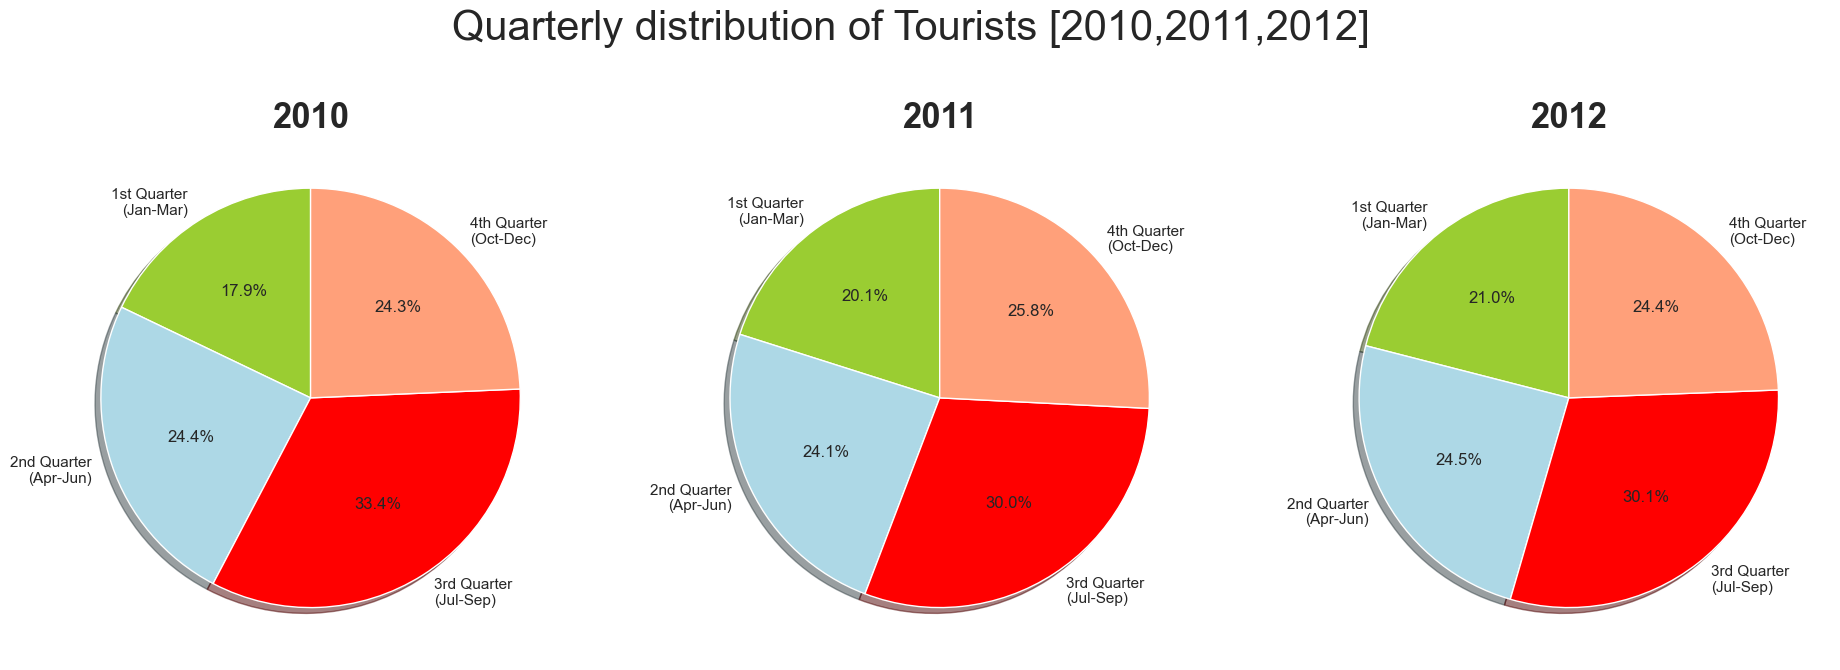

In [40]:
fig, axes = plt.subplots(1,3, sharex=True, figsize=(23,8))
fig.suptitle('Quarterly distribution of Tourists [2010,2011,2012]', fontsize=30)

quarter_labels=['1st Quarter\n(Jan-Mar)', '2nd Quarter\n(Apr-Jun)', '3rd Quarter\n(Jul-Sep)', '4th Quarter\n(Oct-Dec)']

colors = ['yellowgreen', 'lightblue', 'red', 'lightsalmon']

axes[0].pie(quarterly2010.loc[5,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title("2010", fontsize=25,fontweight='bold')

axes[1].pie(quarterly2011.loc[6,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("2011", fontsize=25,fontweight='bold')

axes[2].pie(quarterly2012.loc[7,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[2].set_title("2012", fontsize=25,fontweight='bold')

plt.show()

As you can see in the above pie charts the 2nd quarter (April-June) and 3rd quarter (July-September) have the highest percentages of foreign tourists visiting Spain, which is due to the hot weather and sunshine that the country has during the summer season. The 1st and 4th quarter are lower as the weather is not as favourable in them months and also alot of destinations in Spain are seasonal and are closed down throughout the winter.

Average percentage distribution FTAs [2005 - 2023]

Putting together the Data Set

In [44]:
quarter1=quarterly[['Year', '1st Quarter']].copy()
quarter2=quarterly[['Year', '2nd Quarter']].copy()
quarter3=quarterly[['Year', '3rd Quarter']].copy()
quarter4=quarterly[['Year', '4th Quarter']].copy()
# quarter.head()
# quarter2.head()
# quarter3.head()
# quarter4.head()

quarter1['1st Quarter']=quarter1['1st Quarter']*quarterly['Arrivals']/100
quarter2['2nd Quarter']=quarter2['2nd Quarter']*quarterly['Arrivals']/100
quarter3['3rd Quarter']=quarter3['3rd Quarter']*quarterly['Arrivals']/100
quarter4['4th Quarter']=quarter4['4th Quarter']*quarterly['Arrivals']/100

Finding the average percentage for each quarter [2005 - 2023]

In [47]:
sum_arrivals=quarterly['Arrivals'].sum()

average_percentage_quarter=[
    quarter1['1st Quarter'].sum()/sum_arrivals * 100,
    quarter2['2nd Quarter'].sum()/sum_arrivals * 100,
    quarter3['3rd Quarter'].sum()/sum_arrivals * 100,
    quarter4['4th Quarter'].sum()/sum_arrivals * 100,
]

average_percentage_quarter

[21.0068719703958, 25.640893675453995, 31.13763339888757, 21.391621346372826]

Plotting the data

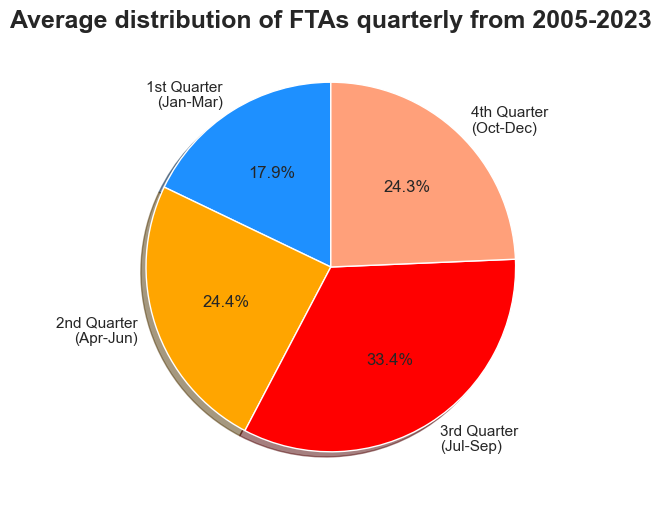

In [50]:
colors = ['yellowgreen', 'dodgerblue', 'orange', 'red', 'lightsalmon']

plt.figure(figsize=(8,6))
plt.pie(quarterly2010.loc[5,:].values.tolist(), labels=quarter_labels, colors=colors[1:],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Average distribution of FTAs quarterly from 2005-2023",fontsize=18,fontweight='bold')

plt.show()

As the pie chart shows the number of foreign tourists is highest throughout the 2nd and 3rd quarter which is the summer season and is the lowest during the 1st and 4th quarter from 2005-2023.

Statistics of the tourism market share in Spain country wise [2017-2019]

In [53]:
import pandas as pd 

market_share=pd.read_csv('contribution-to-market-share.csv')
market_share.head()

,Country,2017,2018,2019
0,UK,18806776,18502722,18012484
1,Germany,11897376,11267269,11158022
2,France,11267269,11897376,11147397
3,Italy,4222865,4382503,4534515
4,Netherlands,3704549,3848545,3684260


Shifting the decimal point 6 places to the left

In [56]:
2017 == '2017'
2018 == '2018'
2019 == '2019'

market_share['2017'] = market_share['2017'] / 10**6
market_share['2018'] = market_share['2018'] / 10**6
market_share['2019'] = market_share['2019'] / 10**6

market_share.to_csv('modified-contribution-to-market-share.csv', index=False)

market_share.head()

,Country,2017,2018,2019
0,UK,18.806776,18.502722,18.012484
1,Germany,11.897376,11.267269,11.158022
2,France,11.267269,11.897376,11.147397
3,Italy,4.222865,4.382503,4.534515
4,Netherlands,3.704549,3.848545,3.684260


Adding in more data

In [59]:
import pandas as pd
country_and_share=pd.read_csv('contribution-to-market-share-and-percentages.csv')
country_and_share.head()

,Country,2017,2018,2019,% share 2017,% share 2018,% share 2019
0,UK,18806776,18502722,18012484,24,23,22
1,Germany,11897376,11267269,11158022,15,14,14
2,France,11267269,11897376,11147397,14,15,14
3,Italy,4222865,4382503,4534515,5,5,5
4,Netherlands,3704549,3848545,3684260,5,5,4


In [61]:
#Dropping columns
country_and_share = country_and_share.drop(['2017', '2018', '2019'], axis=1)
country_and_share.head()

,Country,% share 2017,% share 2018,% share 2019
0,UK,24,23,22
1,Germany,15,14,14
2,France,14,15,14
3,Italy,5,5,5
4,Netherlands,5,5,4


Visualizing the data

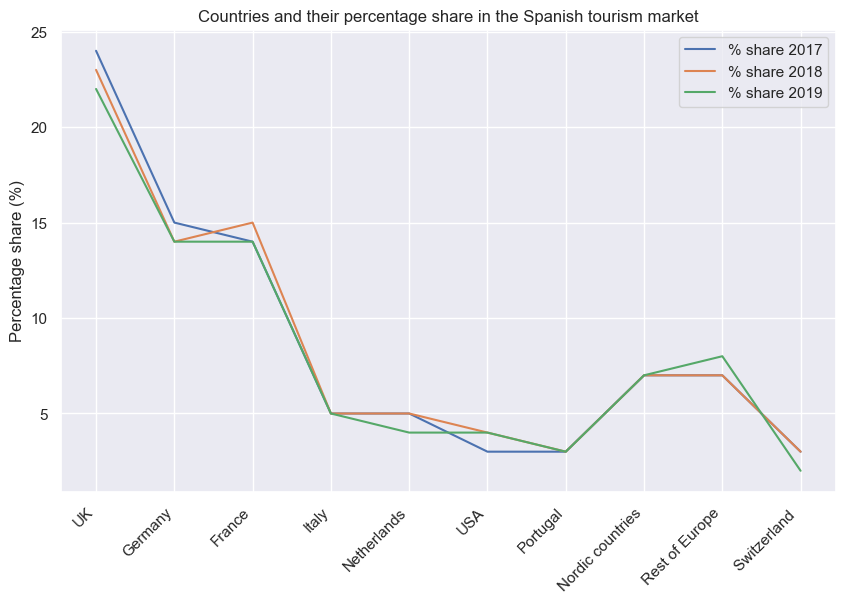

In [64]:
import matplotlib.pyplot as plt

country_and_share.plot(kind='line', figsize=(10,6))

plt.title('Countries and their percentage share in the Spanish tourism market')
plt.ylabel('Percentage share (%)')

plt.xticks(ticks=range(len(country_and_share)), labels=country_and_share['Country'], rotation=45, ha='right')

plt.show()

The results displayed above in the line graph visibly show that most of the main countries that contribute to the tourism market share in Spain are within Europe, with the UK being the highest contributer. Each year the UK takes top place with a close follow by Germany and France, these countries tend to visit Spain more because of the short flight journeys and cheap prices that are available.

Obtaining 6 countries with the highest percentage share 

In [67]:
highest_countrywise_2017=country_and_share[country_and_share['Country'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2017=highest_countrywise_2017[['Country','% share 2017']]

highest_countrywise_2017.sort_values(by=['% share 2017'],ascending=False,inplace=True)
highest_countrywise_2017=highest_countrywise_2017.iloc[0:6,:]

perc_sum=highest_countrywise_2017['% share 2017'].sum()


others_entry = pd.DataFrame.from_records([
    {'Country':'Others','% share 2017':(100-perc_sum)}
])

highest_countrywise_2017 = pd.concat([highest_countrywise_2017, others_entry], ignore_index=True)



highest_countrywise_2018=country_and_share[country_and_share['Country'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2018=highest_countrywise_2018[['Country','% share 2018']]

highest_countrywise_2018.sort_values(by=['% share 2018'],ascending=False,inplace=True)
highest_countrywise_2018=highest_countrywise_2018.iloc[0:6,:]

perc_sum=highest_countrywise_2018['% share 2018'].sum()


others_entry = pd.DataFrame.from_records([
    {'Country':'Others','% share 2018':(100-perc_sum)}
])

highest_countrywise_2018 = pd.concat([highest_countrywise_2018, others_entry], ignore_index=True)


 

highest_countrywise_2019=country_and_share[country_and_share['Country'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2019=highest_countrywise_2019[['Country','% share 2019']]

highest_countrywise_2019.sort_values(by=['% share 2019'],ascending=False,inplace=True)
highest_countrywise_2019=highest_countrywise_2019.iloc[0:6,:]

perc_sum=highest_countrywise_2019['% share 2019'].sum()


others_entry = pd.DataFrame.from_records([
    {'Country':'Others','% share 2019':(100-perc_sum)}
])

highest_countrywise_2019 = pd.concat([highest_countrywise_2019, others_entry], ignore_index=True)

Visualizing the Data Set

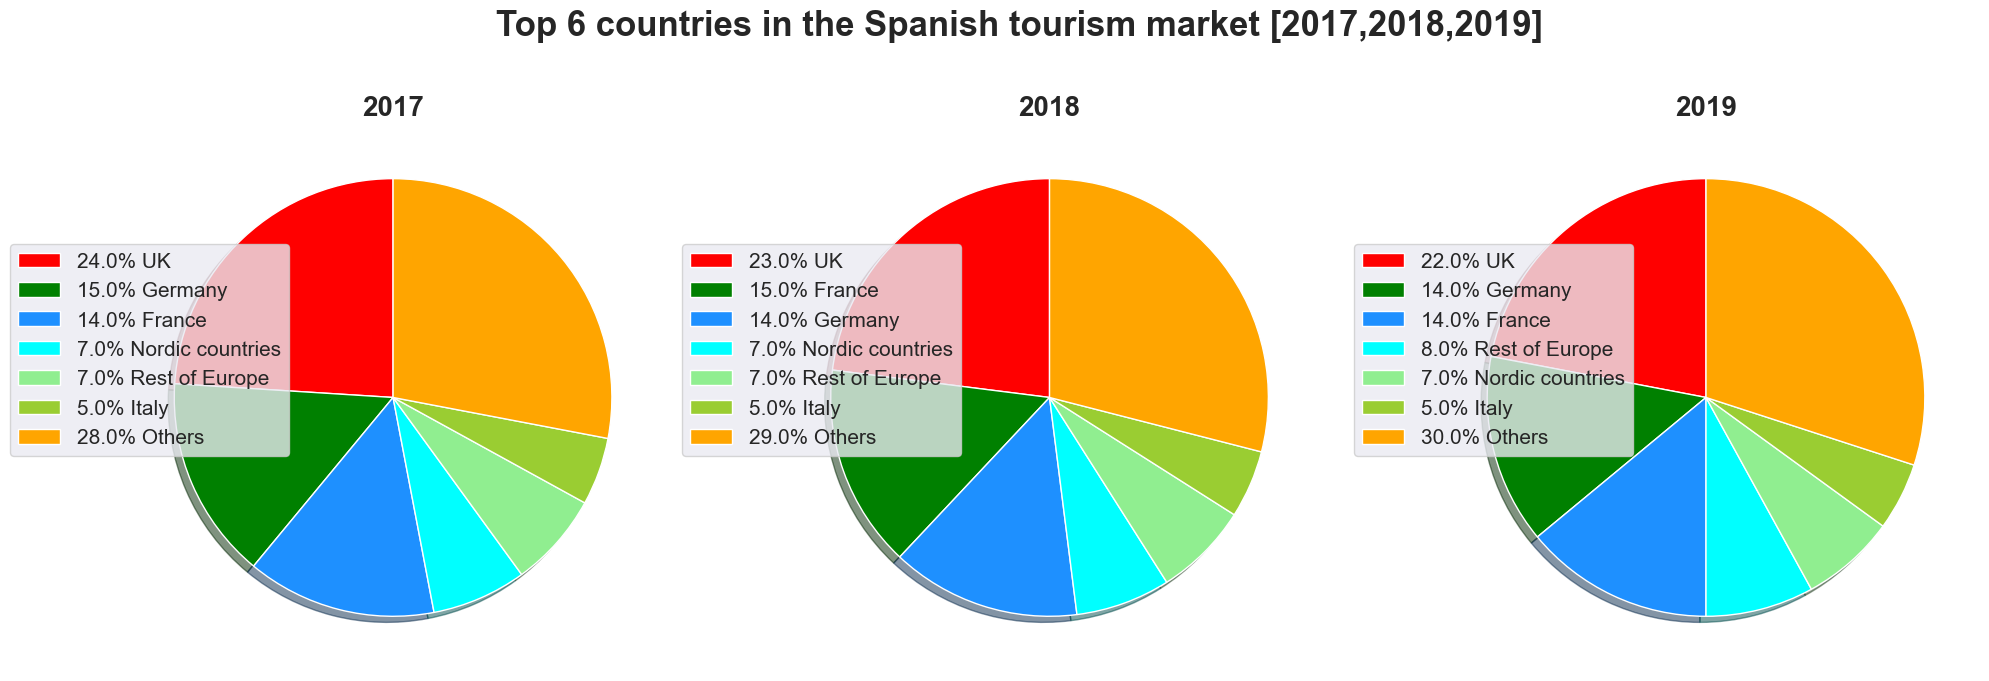

In [70]:
countries_2017 = highest_countrywise_2017['Country']
percents_2017 = highest_countrywise_2017['% share 2017']

countries_2018 = highest_countrywise_2018['Country']
percents_2018 = highest_countrywise_2018['% share 2018']

countries_2019 = highest_countrywise_2019['Country']
percents_2019 = highest_countrywise_2019['% share 2019']

fig, axs = plt.subplots(1,3, figsize=(24,8))
fig.suptitle('Top 6 countries in the Spanish tourism market [2017,2018,2019]',fontsize=25,fontweight='bold')

colors = ['red', 'green', 'dodgerblue', 'aqua', 'lightgreen', 'yellowgreen', 'orange']

pie=axs[0].pie(highest_countrywise_2017['% share 2017'], colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2017['% share 2017']*100/highest_countrywise_2017['% share 2017'].sum()
axs[0].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2017['Country'])],
    bbox_to_anchor=(0.2,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axs[0].set_title("2017",fontsize=20,fontweight='bold')

pie=axs[1].pie(highest_countrywise_2018['% share 2018'], colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2018['% share 2018']*100/highest_countrywise_2018['% share 2018'].sum()
axs[1].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2018['Country'])],
    bbox_to_anchor=(0.48,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axs[1].set_title("2018",fontsize=20,fontweight='bold')

pie=axs[2].pie(highest_countrywise_2019['% share 2019'],  colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2019['% share 2019']*100/highest_countrywise_2019['% share 2019'].sum()
axs[2].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2019['Country'])],
    bbox_to_anchor=(0.76,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axs[2].set_title("2019",fontsize=20,fontweight='bold')

plt.show()

The results shown above present that throughout the years 2017, 2018 and 2019 the input in to the Spanish tourism market share has been a constant with the UK, Germany and France. France took over Germany in the year 2018, and then went back to third place in the following year. These three countries are consistenly the top ones to visit Spain each year. 

Comparison of Foreign and Domestic Tourists in Spain and their reason for travel [2018 & 2019]

In [42]:
import pandas as pd
country_and_reason = pd.read_csv('purpose-of-visit.csv')
country_and_reason.head()

,Tourist type,Leisure (visit),Business (visit),Other (visit)
0,FTA 2018,72173054,5023355,5612005
1,DT 2018,20720434,3486891,2889691
2,FTA 2019,73126124,5388120,5186766
3,DT 2019,19801108,4255343,2531932


Moving the decimal point 6 places to the left

In [45]:
columns_to_modify = ['Leisure (visit)', 'Business (visit)', 'Other (visit)']

country_and_reason[columns_to_modify] = country_and_reason[columns_to_modify] / 10**6

country_and_reason.head()

,Tourist type,Leisure (visit),Business (visit),Other (visit)
0,FTA 2018,72.173054,5.023355,5.612005
1,DT 2018,20.720434,3.486891,2.889691
2,FTA 2019,73.126124,5.388120,5.186766
3,DT 2019,19.801108,4.255343,2.531932


Melting and plotting the Data Set

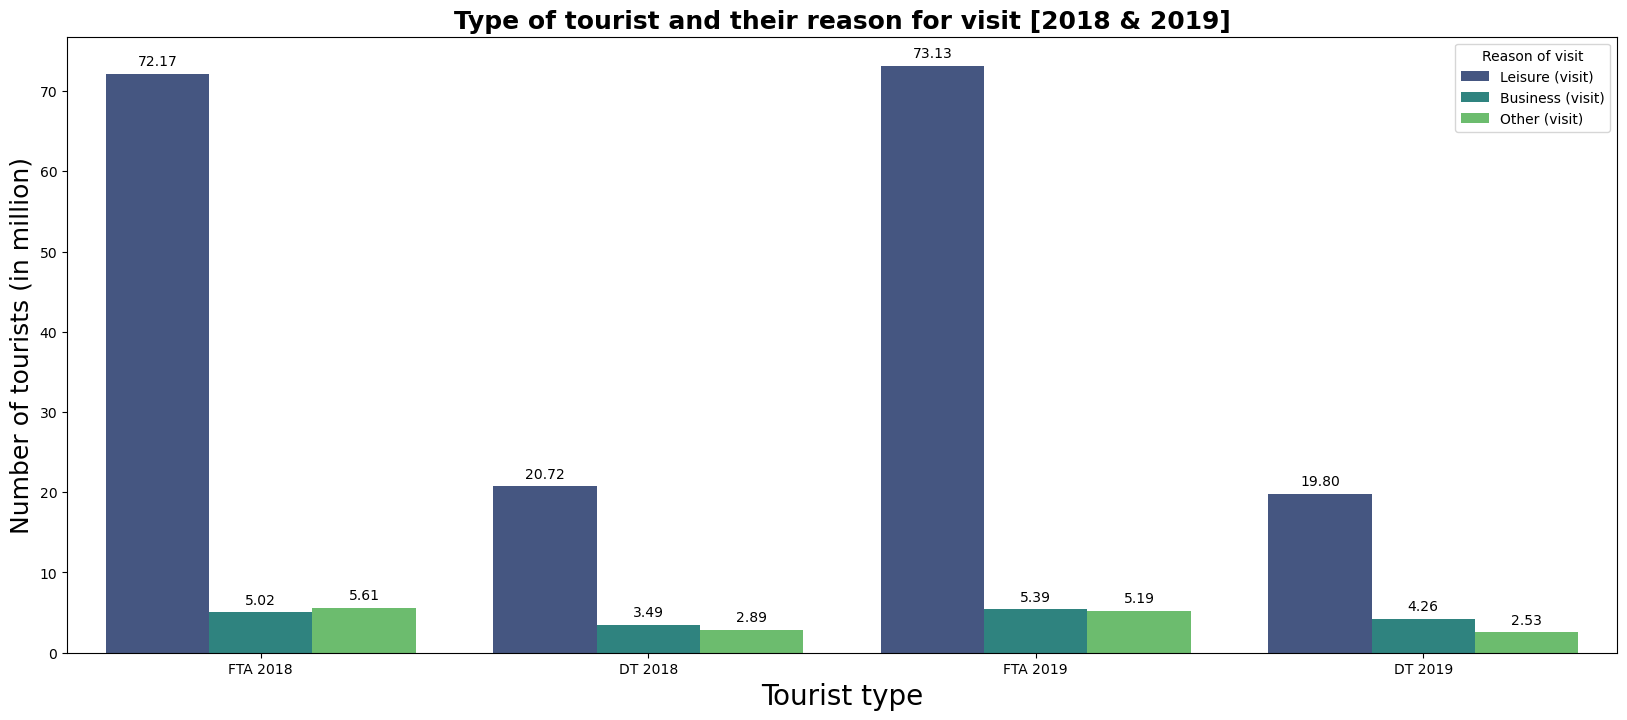

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.melt(
    country_and_reason, 
    id_vars=['Tourist type'], 
    value_vars=["Leisure (visit)", "Business (visit)", "Other (visit)"],
    var_name="Reason of visit",
    value_name="Number of tourists (in million)"
)
    

plt.figure(figsize=(20,8))

ax=sns.barplot(x= 'Tourist type',y='Number of tourists (in million)', hue="Reason of visit", data = df, palette='viridis')

for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha = 'center', va = 'center',   
                    xytext = (0, 9),                
                    textcoords = 'offset points')

plt.ylabel("Number of tourists (in million)", fontsize=18)
plt.xlabel('Tourist type', fontsize=20)
plt.title("Type of tourist and their reason for visit [2018 & 2019]", fontsize=18,fontweight='bold')

plt.show()

As you can see in the bar plot above the main reason to visit Spain for both foreign and domestic tourists is 'Lesiure', followed second by business and then thirdly by other reasons. Spain is a very touristic country during the summer season due to the hot weather they have, the islands, beaches and attractions, etc. This entices alot of people every year to come and spend their leisurly time within Spain. 

Countries and their reason for visit (2022)

Preparing the Data Set

In [62]:
import pandas as pd

country_and_reason = pd.read_csv('country-and-their-purpose.csv')
country_and_reason.head()

,Country,Arrivals,Business (%),Other (%),Leisure (%)
0,UK,15116684,6.1,7.2,86.7
1,Germany,9763261,6.2,7.1,86.5
2,France,10091315,6.0,7.3,86.7
3,Italy,4002647,7.0,6.9,86.1
4,Ireland,2087241,5.1,6.0,88.9


In [64]:
# Let's assume that these are the percentage columns we want to convert
percentage_columns = ['Business (%)', 'Other (%)', 'Leisure (%)']

# Convert percentages to actual values and shift the decimal point 6 places to the left
for col in percentage_columns:
    if col in country_and_reason.columns:
        country_and_reason[col] = country_and_reason[col] * country_and_reason['Arrivals'] / 100 * 10**-6

country_and_reason.drop('Arrivals', axis=1, inplace=True)

country_and_reason.rename(columns={
    'Business (%)':'Business',
    'Other (%)':'Other',
    'Leisure (%)':'Leisure'
},inplace=True)

# Display the modified DataFrame
country_and_reason.head()


,Country,Business,Other,Leisure
0,UK,0.922118,1.088401,13.106165
1,Germany,0.605322,0.693192,8.445221
2,France,0.605479,0.736666,8.749170
3,Italy,0.280185,0.276183,3.446279
4,Ireland,0.106449,0.125234,1.855557


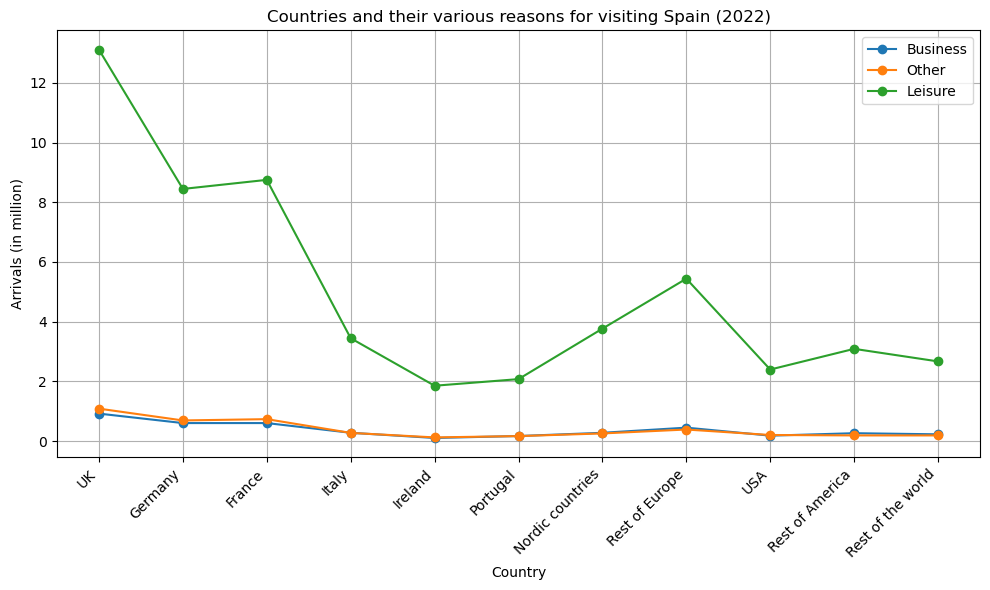

In [66]:
# Plot the data 

plt.figure(figsize=(10, 6)) 

 

# Plot each line for Business (%), Other (%), and Leisure (%) 

plt.plot(country_and_reason['Country'], country_and_reason['Business'], marker='o', label='Business') 

plt.plot(country_and_reason['Country'], country_and_reason['Other'], marker='o', label='Other') 

plt.plot(country_and_reason['Country'], country_and_reason['Leisure'], marker='o', label='Leisure') 

 

# Add labels and title 

plt.xlabel('Country') 

plt.ylabel('Arrivals (in million)') 

plt.title('Countries and their various reasons for visiting Spain (2022)') 

 

# Rotate x-axis labels to prevent them from overlapping 

plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees 

 

# Add legend 

plt.legend() 

 

# Adjust layout to prevent clipping of labels 

plt.tight_layout() 

 

# Show the plot 

plt.grid(True) 

plt.show() 

As displayed in the line graph you can see that each countries main purpose of visit to Spain is for leisure. Whilst the key reason for going to Spain is for leisure, it is the least for business and other purposes. Even though business is not the main purpose this type of tourism is increasing every year in the country. In 2023 Spain received 4.83 million foreign business tourists, and in that same year expenditure from foreign and domestic business tourists accounted for 11% of the total tourism spending in Spain.

In [68]:
# Parsing dataframe
countrywise=country_and_reason[country_and_reason['Country'].isin(['Total','Grand Total','Not Classified Elsewhere','OTHERS'])==False].copy()


country_and_reason = country_and_reason.sort_values(by='Business', ascending=False).head(5)
country_and_reason = country_and_reason.sort_values(by='Other', ascending=False).head(5)
country_and_reason = country_and_reason.sort_values(by='Leisure', ascending=False).head(5)


country_and_reason=country_and_reason.round(decimals=2)

country_and_reason.head()

,Country,Business,Other,Leisure
0,UK,0.92,1.09,13.11
2,France,0.61,0.74,8.75
1,Germany,0.61,0.69,8.45
7,Rest of Europe,0.45,0.39,5.44
3,Italy,0.28,0.28,3.45


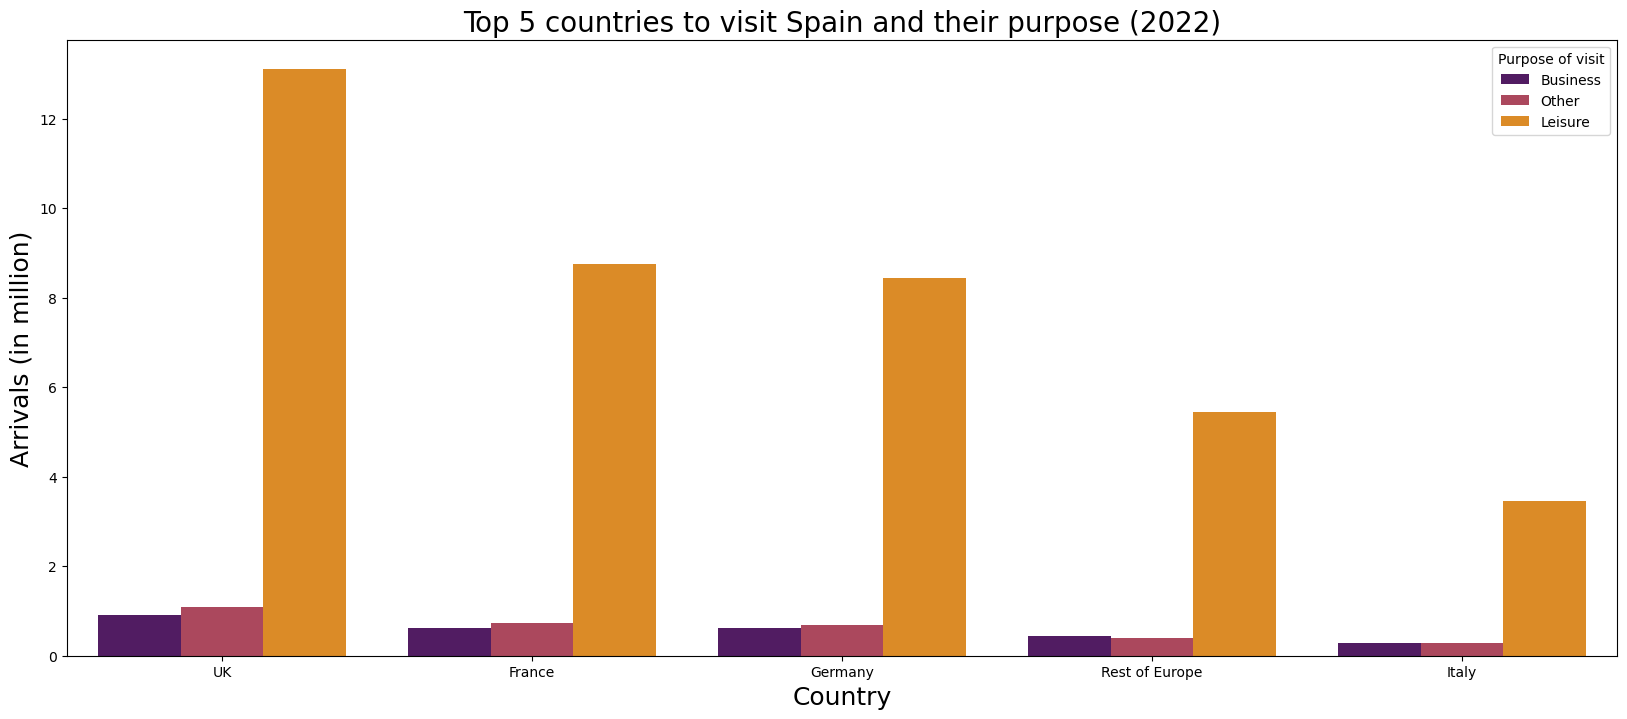

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.melt(country_and_reason,['Country']).rename(columns={"variable":"Purpose of visit"})

plt.figure(figsize=(20,8))
sns.barplot(x ='Country',y='value', hue='Purpose of visit',data = df, palette='inferno')

plt.ylabel('Arrivals (in million)',fontsize=18)
plt.xlabel('Country',fontsize=18)
plt.title('Top 5 countries to visit Spain and their purpose (2022)',fontsize=20)

plt.show()

As can be observed above, the UK is the country that contributes the most to the tourism sector in Spain. The majority of the visitors from the UK went to Spain based on leisure purposes. Each year the UK accounts for roughly 22-24% of overall visitors to the country. This signifies that leisure has been and is currently the main origin of international tourists to Spain.

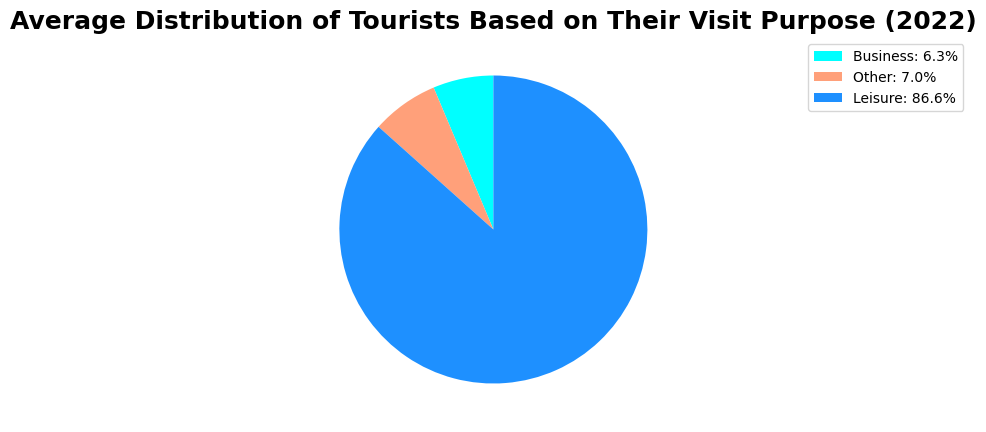

In [78]:
# Calculate the Grand Total for each column (purpose)
grand_total = country_and_reason.iloc[:, 1:].sum()  # Assuming the first column is 'Country'

# Calculate the Average Distribution (mean)
average_distribution = grand_total / grand_total.sum() * 100

# Define the labels (these would be your column names except 'Country')
labels = country_and_reason.columns[1:]  # Assuming 'Country' is the first column

# Define colors (optional)
colors = ['Aqua', 'Lightsalmon', 'Dodgerblue']

# Create formatted legend labels with percentages
legend_labels = [f'{label}: {value:.1f}%' for label, value in zip(labels, average_distribution)]

# Create the pie chart
plt.figure(figsize=(7, 5))
plt.pie(average_distribution, labels=None, colors=colors, autopct=None, startangle=90)

# Add a title
plt.title('Average Distribution of Tourists Based on Their Visit Purpose (2022)', fontsize=18, fontweight='bold')

# Add a legend with labels and percentages
plt.legend(legend_labels, loc="upper left", bbox_to_anchor=(1.3, 1))

# Display the chart
plt.show()

It can be concluded from the above pie chart that most of the tourists that visit Spain go there for leisure purposes. Spain has various attractions across the country that will fascinate people with its history and architecture, natural wonders, food and beaches. This makes Spain the perfect destination to spend leisurley time.   

In [86]:
import pandas as pd

zone_data = pd.read_csv('zones.csv')
zone_data.head()

,Zone,Domestic 2017,Foreign 2017,Domestic 2018,Foreign 2018,Annual change DT 2018/2017,Annual change FT 2018/2017
0,Andalucia,6326090,11530070,6049878,11693927,-4.4,1.4
1,The Balearics,535105,13790968,827585,13856456,35.3,0.5
2,The Canary islands,1434853,14213686,1600217,13751914,11.5,-3.3
3,Cataluyna,4726412,19046720,6235429,19123195,32.0,0.0
4,Valencia,3172311,8918327,3986643,9208898,25.7,3.2


In [88]:
foreign_zone = zone_data[['Zone','Foreign 2017','Foreign 2018']].copy()

foreign_zone.sort_values(by=['Foreign 2017'], ascending=False, inplace=True)
foreign_zone=foreign_zone[foreign_zone['Zone'].isin(['Grand total'])==False]

foreign_zone['Foreign 2017']=foreign_zone['Foreign 2017'] * 10**-6
foreign_zone['Foreign 2018']=foreign_zone['Foreign 2018'] * 10**-6

foreign_zone.head()

,Zone,Foreign 2017,Foreign 2018
3,Cataluyna,19.046720,19.123195
2,The Canary islands,14.213686,13.751914
1,The Balearics,13.790968,13.856456
0,Andalucia,11.530070,11.693927
4,Valencia,8.918327,9.208898


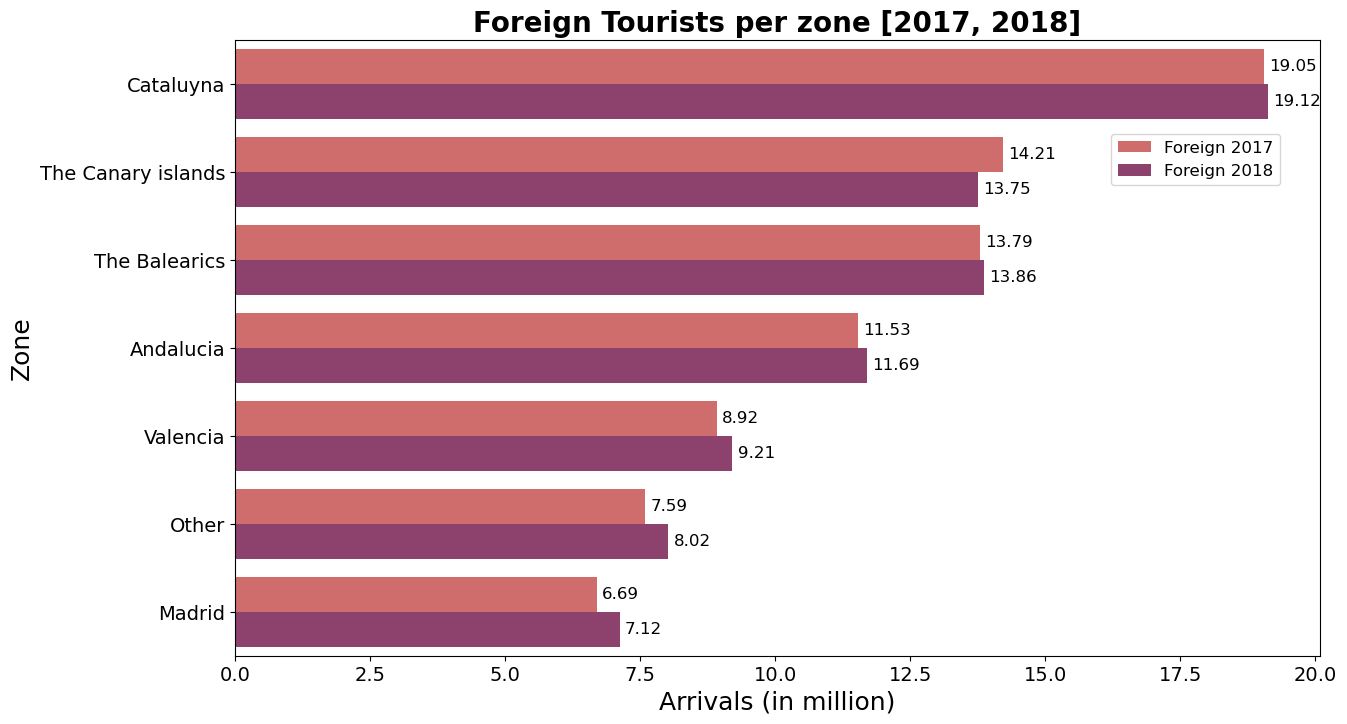

In [154]:
# Melt the dataframe to combine the years into a single column
df = pd.melt(foreign_zone, ['Zone']).rename(columns={"variable": "Year"})

# Plotting the data on a horizontal bar graph
plt.figure(figsize=(14, 8))  # Adjusted figure size for better readability
ax = sns.barplot(x="value", y="Zone", data=df, hue='Year', palette='flare')

# Adding data labels to the bars
for p in ax.patches:
    width = p.get_width()  # Get bar length
    if width > 0.01:  # Only add label if the width is greater than 0.01
        ax.text(width + 0.1,  # Set the text at 0.5 units right of the bar
                p.get_y() + p.get_height() / 2,  # Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),  # Set variable to display, 2 decimals
                ha='left',  # Horizontal alignment
                va='center',  # Vertical alignment
                fontsize=12)  # Adjusted font size

# Adding title and labels
plt.title("Foreign Tourists per zone [2017, 2018]", fontsize=20, fontweight='bold')
plt.xlabel("Arrivals (in million)", fontsize=18)
plt.ylabel("Zone", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(0.80,0.75), loc='lower left', prop={'size': 12})  # Moved legend down

# Display the chart
plt.show()

As can be seen in the horizontal barplot during the years of 2017 and 2018 Cataluyna, The Canary Islands and The Balearics were the top three destinations that foreign tourists visited within Spain. The islands are very popular with foreign arrivals due to the beautiful beaches they have and their attractions. Cataluyna is the most populist with foreign tourists because it has cities and beaches, so it gives the best of both worlds.

In [96]:
domestic_zone = zone_data[['Zone','Domestic 2017','Domestic 2018']].copy()

domestic_zone.sort_values(by=['Domestic 2017'], ascending=False, inplace=True)
domestic_zone=domestic_zone[domestic_zone['Zone'].isin(['Grand total'])==False]

domestic_zone['Domestic 2017']=domestic_zone['Domestic 2017'] * 10**-6
domestic_zone['Domestic 2018']=domestic_zone['Domestic 2018'] * 10**-6

domestic_zone.head()

,Zone,Domestic 2017,Domestic 2018
6,Other,8.909497,9.412524
0,Andalucia,6.326090,6.049878
3,Cataluyna,4.726412,6.235429
5,Madrid,3.618542,7.106440
4,Valencia,3.172311,3.986643


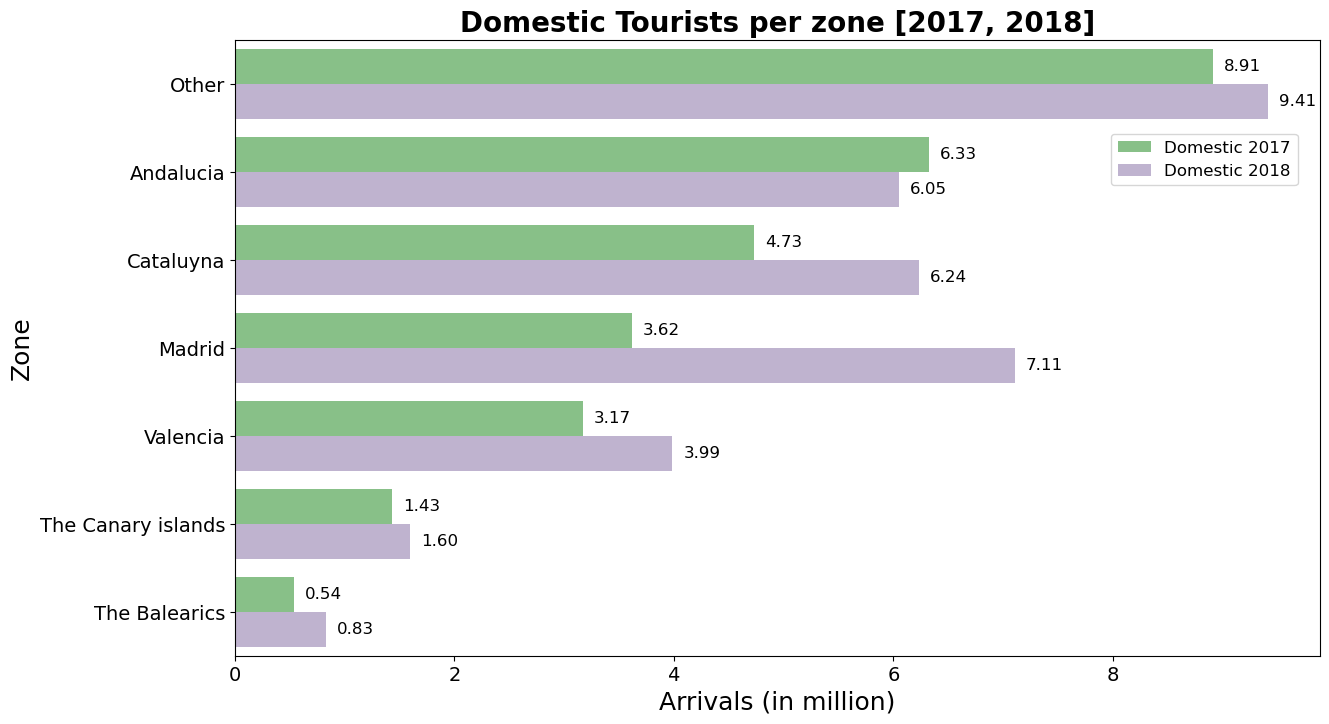

In [152]:
# Melt the dataframe to combine the years into a single column
df = pd.melt(domestic_zone, ['Zone']).rename(columns={"variable": "Year"})

# Plotting the data on a horizontal bar graph
plt.figure(figsize=(14, 8))  # Adjusted figure size for better readability
ax = sns.barplot(x="value", y="Zone", data=df, hue='Year', palette='Accent')

# Adding data labels to the bars
for p in ax.patches:
    width = p.get_width()  # Get bar length
    if width > 0.01:  # Only add label if the width is greater than 0.01
        ax.text(width + 0.1,  # Set the text at 0.5 units right of the bar
                p.get_y() + p.get_height() / 2,  # Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),  # Set variable to display, 2 decimals
                ha='left',  # Horizontal alignment
                va='center',  # Vertical alignment
                fontsize=12)  # Adjusted font size

# Adding title and labels
plt.title("Domestic Tourists per zone [2017, 2018]", fontsize=20, fontweight='bold')
plt.xlabel("Arrivals (in million)", fontsize=18)
plt.ylabel("Zone", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(0.80,0.75), loc='lower left', prop={'size': 12})  # Moved legend down

# Display the chart
plt.show()

As the horizontal barplot shows above the top three destinations in Spain for domestic tourists are 'Other','Andalucia' and 'Cataluyna'. The category 'Other' includes various destinations across the country such as Cantabria, Castilla - La Mancha, La Rioja, etc. Andalucia is a very popular option for domestic tourists as it is the cheapest part of Spain to live and vacation, and also there is alot of beaches there in places like Malaga and Marbella. Cataluyna is also a very popular zone for domestic tourists like it is for foreign arrivals due to its history, vibrant nightlife and sandy beaches, there is something for everybody there.

In [132]:
# parsing the dataframe
total_zone=zone_data[['Zone','Domestic 2017','Foreign 2017','Domestic 2018','Foreign 2018']].copy()
# calculating total tourists to States/UTs
total_zone['Total Tourists (in million)']= total_zone['Domestic 2017']+ total_zone['Foreign 2017']+ total_zone['Domestic 2018']+ total_zone['Foreign 2018']
# dropping columns
total_zone.drop(['Domestic 2017','Foreign 2017','Domestic 2018','Foreign 2018'], axis=1, inplace=True)
# sorting by Total Tourists in descending order
total_zone.sort_values(by=["Total Tourists (in million)"], ascending=False, inplace=True)
total_zone=total_zone[total_zone['Zone'].isin(['Grand Total'])==False]
# shifting the decimal places by 6 to the left and round upto 2 decimal points
total_zone["Total Tourists (in million)"]= (total_zone['Total Tourists (in million)']* 10**-6).round(2)

# fetching the 5 most visited States/UTs
total_zone=total_zone.iloc[0:5]

total_zone.head()

,Zone,Total Tourists (in million)
3,Cataluyna,49.13
0,Andalucia,35.60
6,Other,33.93
2,The Canary islands,31.00
1,The Balearics,29.01


In [144]:
import pandas as pd

destinations = pd.read_csv('top-10-destinations.csv')
destinations.head()

,Destination,Attraction,Foreign 2022,Domestic 2022,Foreign 2023,Domestic 2023,% - Annual growth 22-23 (Foreign),% - Annual growth 22-23 (Domestic)
0,Madrid,Palacio Real,2298663,392411,2417784,409889,4.9,4.3
1,Pamplona,Bull race,258167,1441833,339876,1502277,24.0,4.0
2,San Sebastian,La Concha,862872,311749,1018883,366881,15.3,15.0
3,Segovia,Aqueduct of Segovia,483466,211992,509733,229655,5.6,7.7
4,Castilla - La Mancha,Cuenca,303886,487903,366881,533669,17.2,8.6


In [146]:
# Select only the necessary columns from the DataFrame
attraction_tourist = destinations[['Destination', 'Foreign 2022', 'Domestic 2022']].copy()

# Sort by Foreign 2022 in descending order
attraction_tourist.sort_values(by=['Foreign 2022'], ascending=False, inplace=True)

# Convert the values to thousands
attraction_tourist['Foreign 2022'] = (attraction_tourist['Foreign 2022'] * 10**-6).round(2)
attraction_tourist['Domestic 2022'] = (attraction_tourist['Domestic 2022'] * 10**-6).round(2)

# Display the result
attraction_tourist.head()

,Destination,Foreign 2022,Domestic 2022
6,Barcelona,3.31,0.49
5,Illes Balears,2.73,0.27
0,Madrid,2.30,0.39
9,Granada,1.84,0.16
8,Cordoba,1.14,0.42


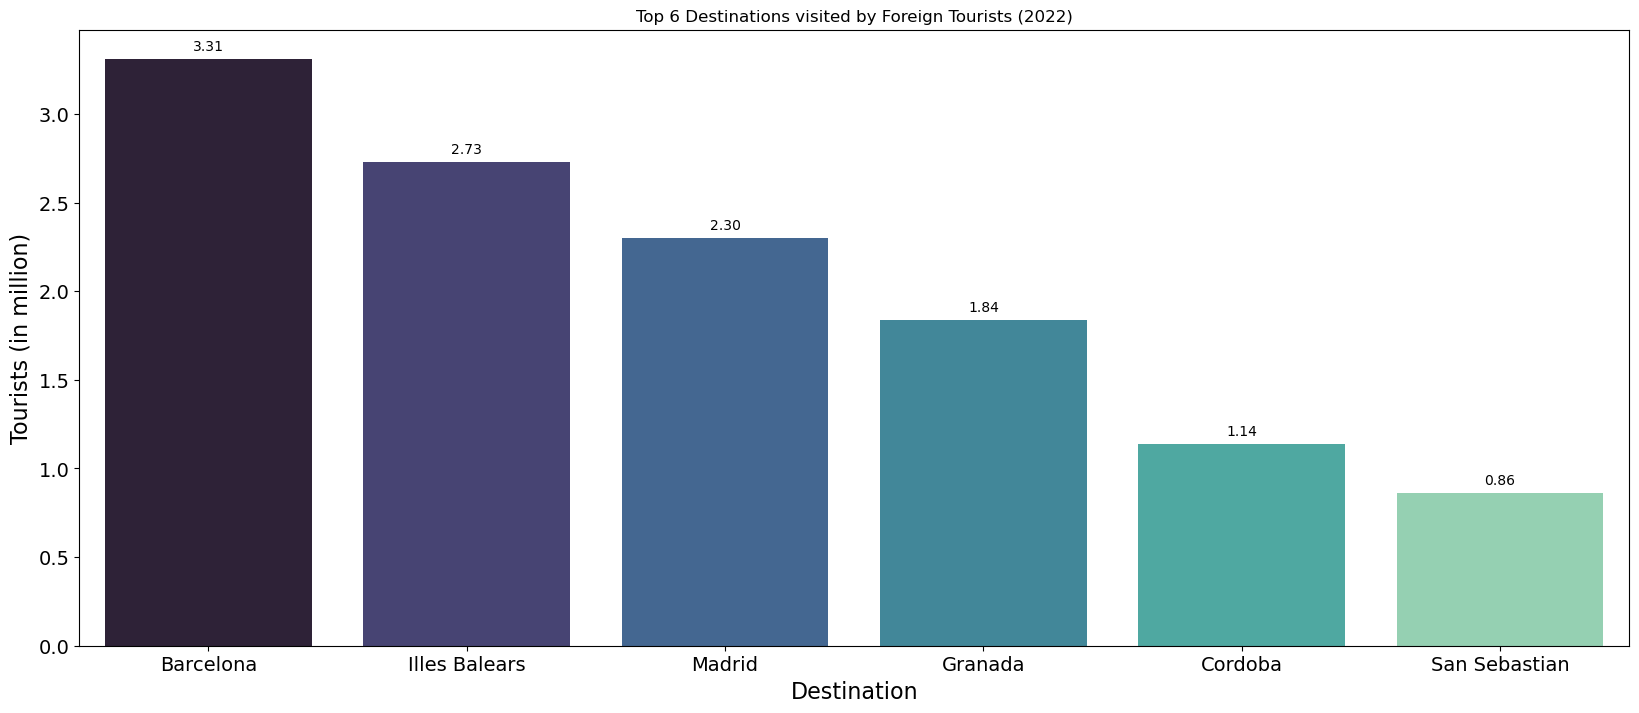

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe based on 'Foreign 2022' in descending order
attraction_tourist = attraction_tourist.sort_values(by='Foreign 2022', ascending=False)

plt.figure(figsize=(20,8))

# Plot the sorted data with 'hue' assigned and 'legend=False'
g = sns.barplot(
    x=attraction_tourist['Destination'].iloc[0:6], 
    y=attraction_tourist['Foreign 2022'].iloc[0:6], 
    hue=attraction_tourist['Destination'].iloc[0:6],  # Assign hue
    palette="mako", dodge=False, legend=False
)

# Adding labels to each bar
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 9), textcoords='offset points')

plt.title("Top 6 Destinations visited by Foreign Tourists (2022)")
plt.xlabel("Destination", fontsize=16)
plt.ylabel("Tourists (in million)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


As the graph above exhibits it can be seen that Barcelona was the top destination to visit for foreign tourists in 2022. The reason for this could be that Barcelona has one of Spains most iconic monuments 'The Sagrada Familia' which is a cathedral that attracted around 9000 visitors daily in 2022, and continues to gain more daily visitors every year. The second most visited destination in 2022 for foreign arrivals was the balearics islands and this can be due to the fact that there is four different islands to visit which all have their own personality and something for all tourists.

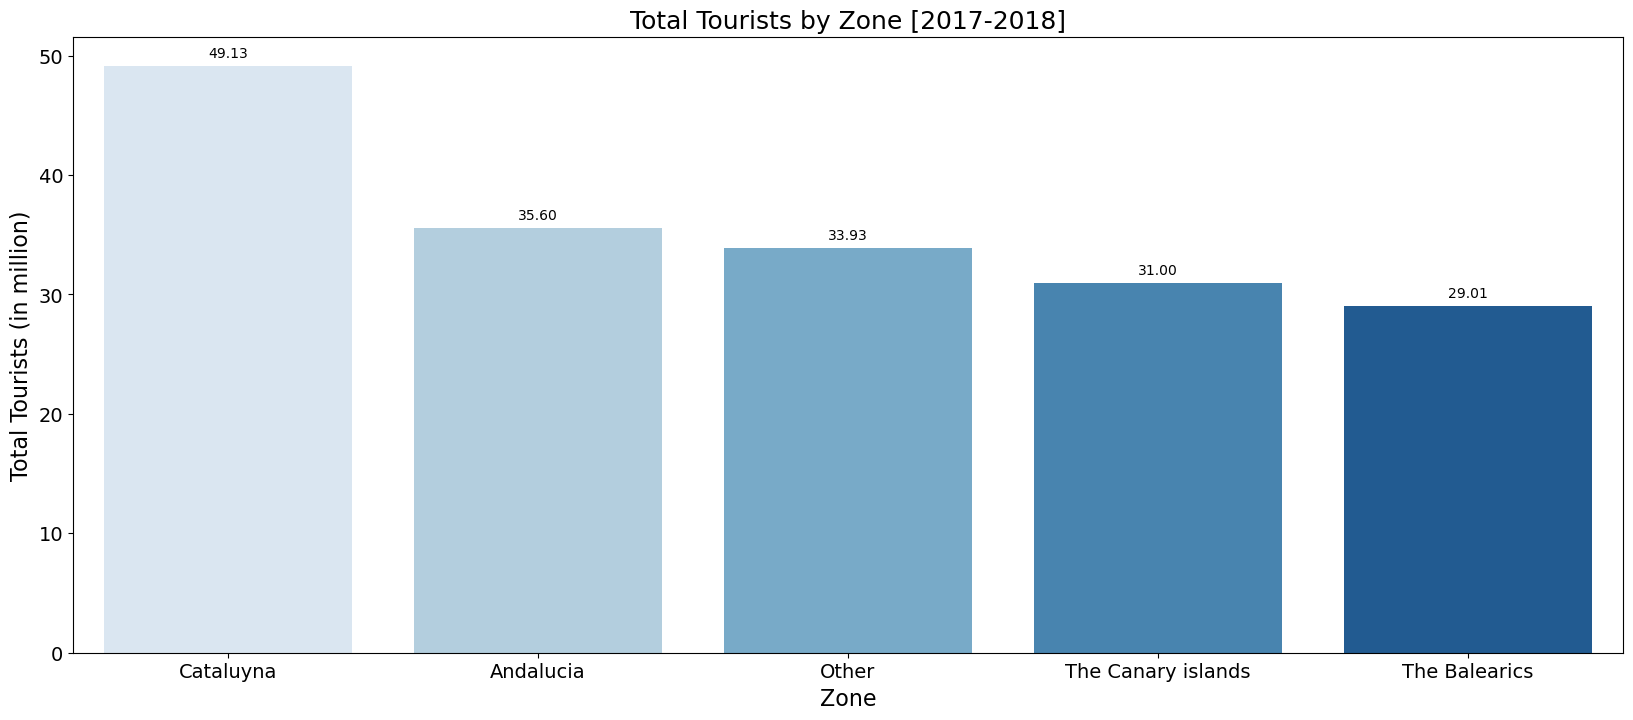

In [173]:
# Plotting the bar graph
plt.figure(figsize=(20,8))

# Creating the bar plot with hue set to the x variable and legend set to False
g = sns.barplot(x=total_zone['Zone'], y=total_zone['Total Tourists (in million)'],
                hue=total_zone['Zone'], palette='Blues', dodge=False, legend=False)

# Adding title and labels
plt.title("Total Tourists by Zone [2017-2018]", fontsize=18)
plt.xlabel("Zone", fontsize=16)
plt.ylabel("Total Tourists (in million)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding labels to each bar
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 9), textcoords='offset points')

# Displaying the chart
plt.show()

Thus from the above bar plot, it can be concluded that Cataluyna stood first in the Spanish tourism sector followed by Andalucia during the years of 2017 and 2018, and still to this day, Cataluyna is the number one visited destination in Spain.

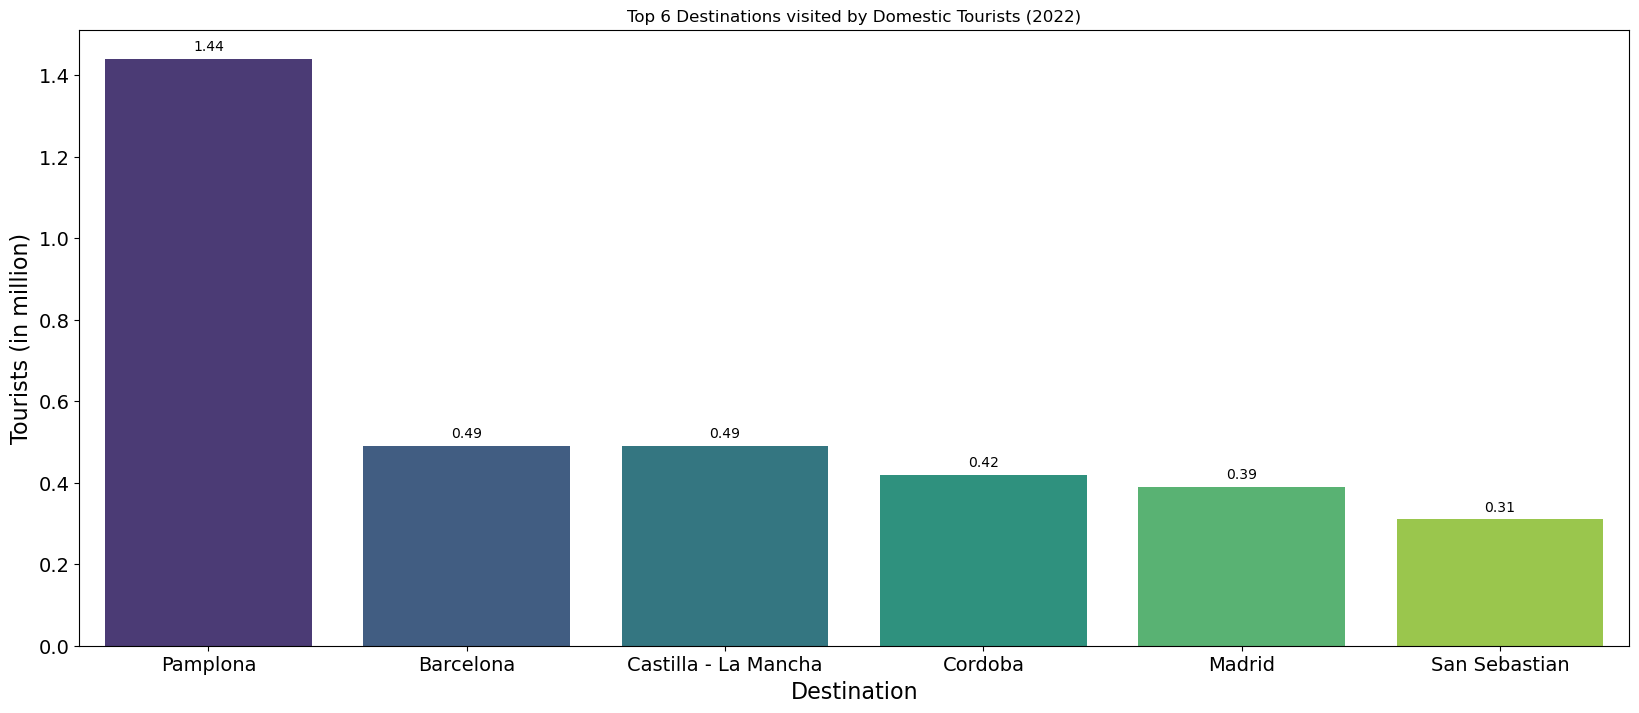

In [150]:
# Sort the dataframe based on 'Foreign 2022' in descending order
attraction_tourist = attraction_tourist.sort_values(by='Domestic 2022', ascending=False)

plt.figure(figsize=(20,8))

# Plot the sorted data with 'hue' assigned and 'legend=False'
g = sns.barplot(
    x=attraction_tourist['Destination'].iloc[0:6], 
    y=attraction_tourist['Domestic 2022'].iloc[0:6], 
    hue=attraction_tourist['Destination'].iloc[0:6],  # Assign hue
    palette="viridis", dodge=False, legend=False
)

# Adding labels to each bar
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 9), textcoords='offset points')

plt.title("Top 6 Destinations visited by Domestic Tourists (2022)")
plt.xlabel("Destination", fontsize=16)
plt.ylabel("Tourists (in million)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

As can be observed in the above bar graph the top destination that was visited by domestic tourists in 2022 was Pamplona and this is due to the attraction of the bull race that is held there every year. A high number of spanish residents travel every year to Pamplona to participate in the race, which gains over a million visits every year. As you can see the favourite destinations of domestic tourists compared to foreign tourists are a little bit different, for example the balearic islands are not even in the top 6 destinations for domestic tourism. At the same time Barcelona is also a very popular destination for spanish residents like it is for foreign arrivals.

In [152]:
# Select only the necessary columns from the DataFrame
attraction_tourist = destinations[['Attraction', 'Foreign 2022', 'Domestic 2022']].copy()

# Sort by Foreign 2022 in descending order
attraction_tourist.sort_values(by=['Foreign 2022'], ascending=False, inplace=True)

# Convert the values to thousands
attraction_tourist['Foreign 2022'] = (attraction_tourist['Foreign 2022'] * 10**-6).round(2)
attraction_tourist['Domestic 2022'] = (attraction_tourist['Domestic 2022'] * 10**-6).round(2)

# Display the result
attraction_tourist.head()

,Attraction,Foreign 2022,Domestic 2022
6,Sagrada Familia,3.31,0.49
5,Ibiza,2.73,0.27
0,Palacio Real,2.30,0.39
9,Alhambra,1.84,0.16
8,Cordoba mosque,1.14,0.42


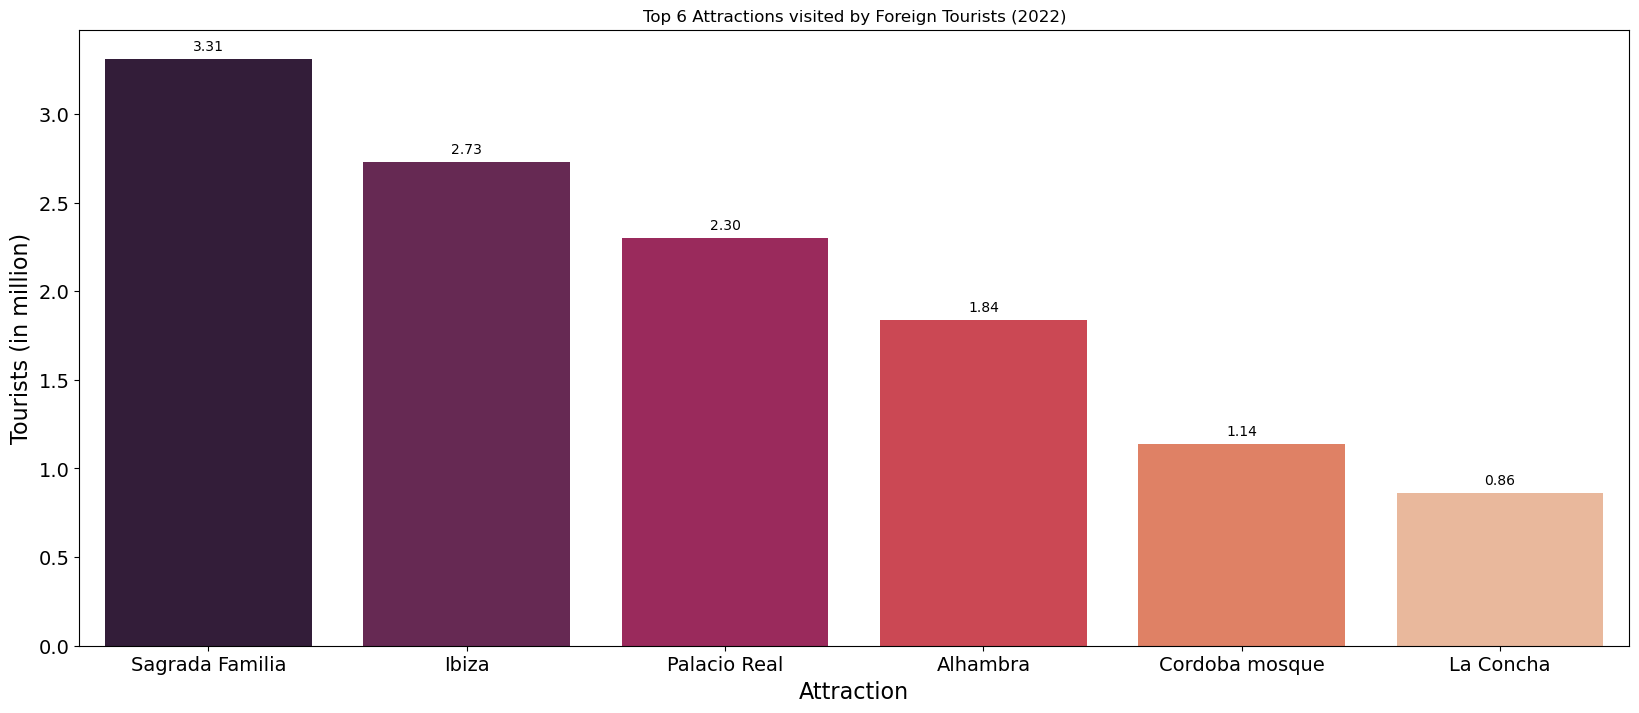

In [126]:
# Sort the dataframe based on 'Foreign 2022' in descending order
attraction_tourist = attraction_tourist.sort_values(by='Foreign 2022', ascending=False)

plt.figure(figsize=(20,8))

# Plot the sorted data with 'hue' assigned and 'legend=False'
g = sns.barplot(
    x=attraction_tourist['Attraction'].iloc[0:6], 
    y=attraction_tourist['Foreign 2022'].iloc[0:6], 
    hue=attraction_tourist['Attraction'].iloc[0:6],  # Assign hue
    palette="rocket", dodge=False, legend=False
)

# Adding labels to each bar
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 9), textcoords='offset points')

plt.title("Top 6 Attractions visited by Foreign Tourists (2022)")
plt.xlabel("Attraction", fontsize=16)
plt.ylabel("Tourists (in million)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

As per the above bar graph, it can be observed that the most visited attraction in 2022 visited by foreign arrivals was the Sagrada Familia, this is probably due to its stunning architecture, history and fascination from the people. The 2nd favorite attraction in 2022 was Ibiza, the island receives millions of foreign tourists each year due to its lively nightlife, beaches and history. 

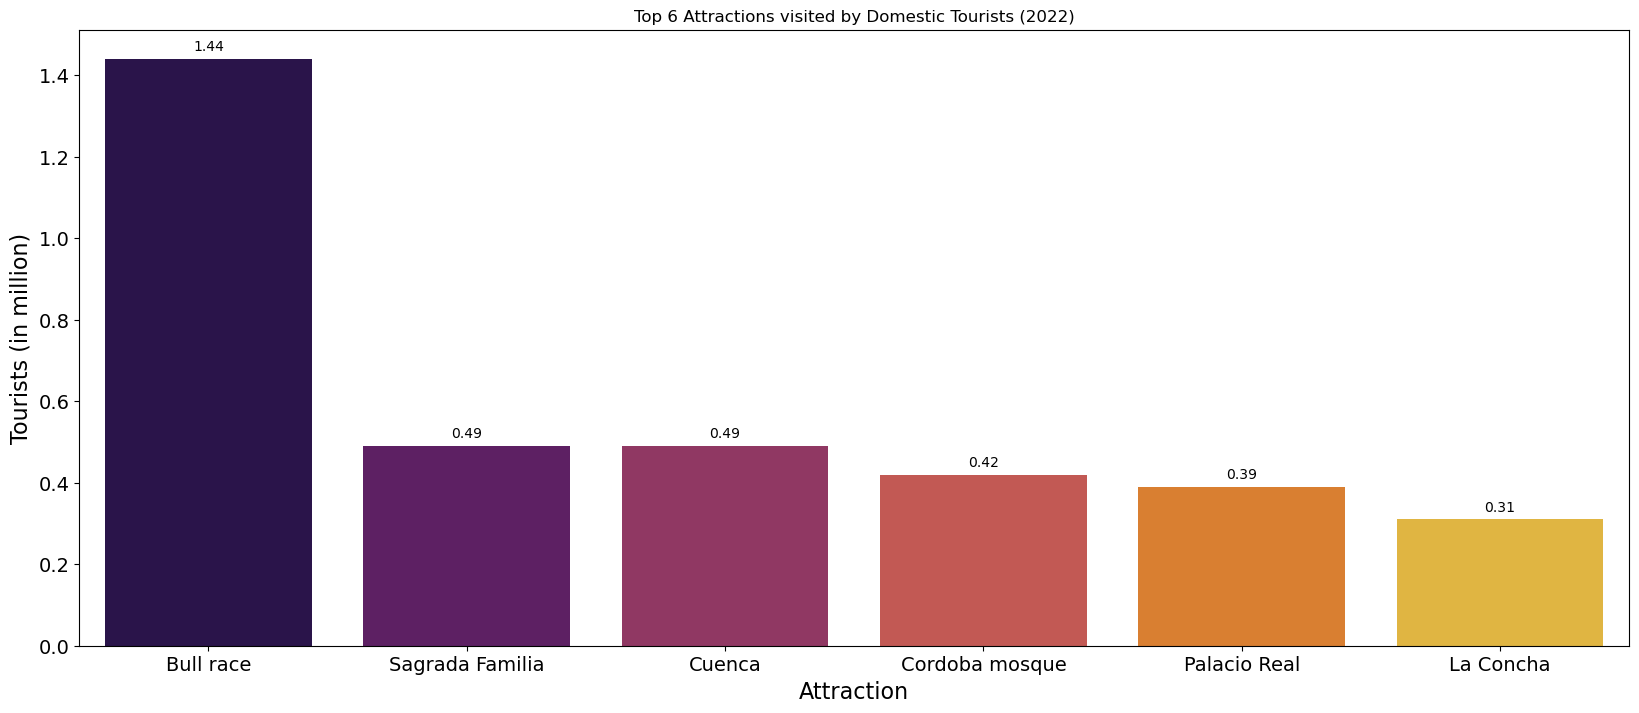

In [130]:
# Sort the dataframe based on 'Foreign 2022' in descending order
attraction_tourist = attraction_tourist.sort_values(by='Domestic 2022', ascending=False)

plt.figure(figsize=(20,8))

# Plot the sorted data with 'hue' assigned and 'legend=False'
g = sns.barplot(
    x=attraction_tourist['Attraction'].iloc[0:6], 
    y=attraction_tourist['Domestic 2022'].iloc[0:6], 
    hue=attraction_tourist['Attraction'].iloc[0:6],  # Assign hue
    palette="inferno", dodge=False, legend=False
)

# Adding labels to each bar
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 9), textcoords='offset points')

plt.title("Top 6 Attractions visited by Domestic Tourists (2022)")
plt.xlabel("Attraction", fontsize=16)
plt.ylabel("Tourists (in million)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

The above bar plot shows that the most visited attraction in 2022 for domestic tourists was the bull race in pamplona, this race entices millions of Spanish residents every year to participate in the festival making it a huge attraction for the area and helping to gain profit for local town where it is held. The domestic tourists share in a commom a favourite attraction with the foreing arrivals, which is the sagrada familia, this monument gained around 3.8 million visitors alone in the year 2022.

In [86]:
import pandas as pd

transport = pd.read_csv('transport-method.csv')
transport.head()

,Transport method,Foreign Tourist arrivals,Domestic Tourist
0,Air transport,67531290,2014307
1,Motor vehicle,12933364,21090199
2,Train,338418,2325932
3,Waterway,1970083,269014


In [88]:
# Sort by Foreign 2022 in descending order
transport.sort_values(by=['Foreign Tourist arrivals'], ascending=False, inplace=True)

# Convert the values to thousands
transport['Foreign Tourist arrivals'] = (transport['Foreign Tourist arrivals'] * 10**-6).round(2)
transport['Domestic Tourist'] = (transport['Domestic Tourist'] * 10**-6).round(2)

# Display the result
transport.head()

,Transport method,Foreign Tourist arrivals,Domestic Tourist
0,Air transport,67.53,2.01
1,Motor vehicle,12.93,21.09
3,Waterway,1.97,0.27
2,Train,0.34,2.33


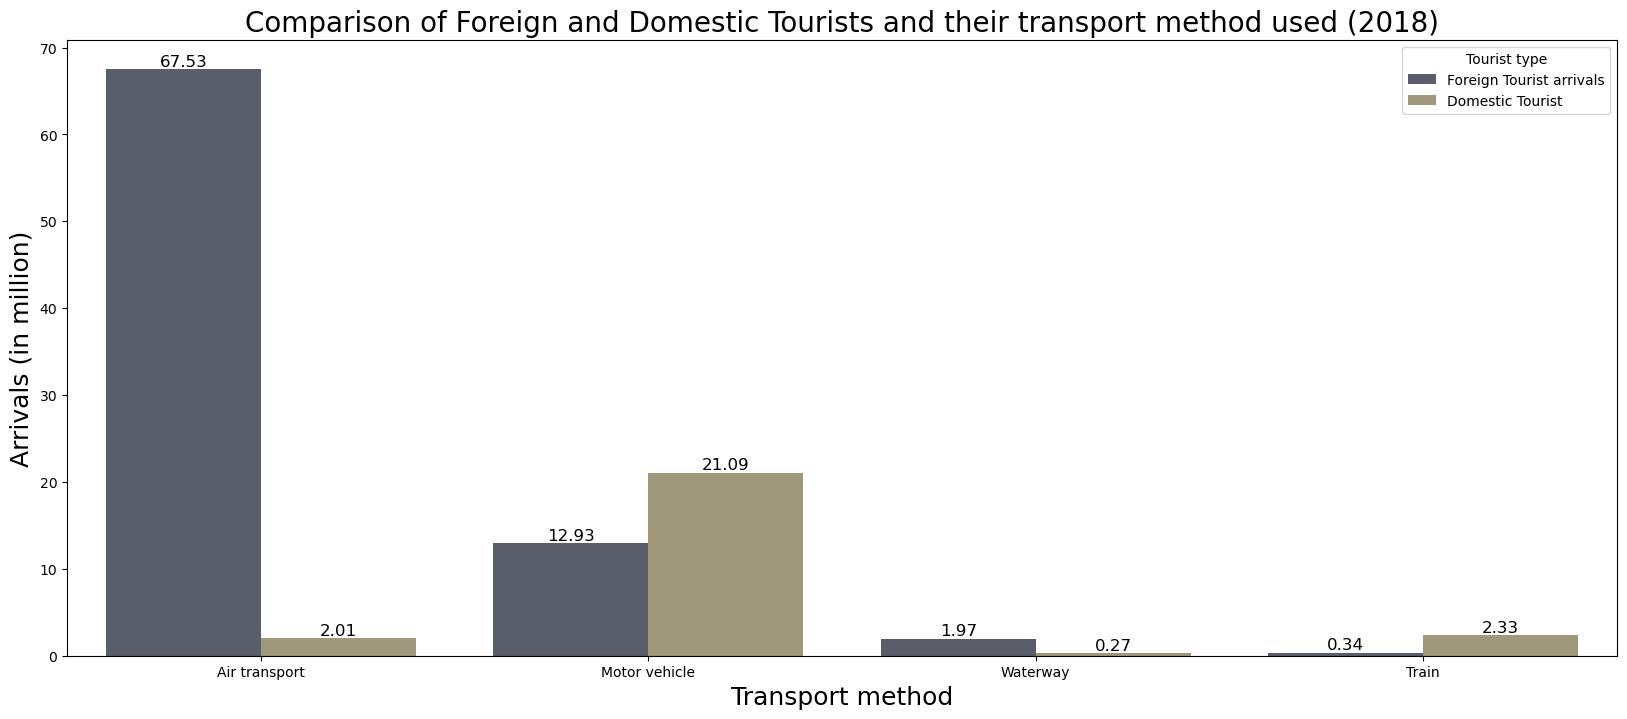

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.melt(transport, ['Transport method']).rename(columns={"variable": "Tourist type"})

plt.figure(figsize=(20,8))
g = sns.barplot(x='Transport method', y='value', hue='Tourist type', data=df, palette='cividis')

# Loop through each bar container (Foreign and Domestic tourist arrivals)
for container in g.containers:
    g.bar_label(container, fontsize=12)  # Add labels to each container

plt.ylabel('Arrivals (in million)',fontsize=18)
plt.xlabel('Transport method',fontsize=18)
plt.title('Comparison of Foreign and Domestic Tourists and their transport method used (2018)',fontsize=20)

plt.show()

As the graph above displays the preferred method of travelling to Spain for foreign arrivals was by air transport, the reason for this is that it is alot quicker for other european countries to fly to Spain, then take a train or drive, and also the prices are very competitive. There is also foreign countries that can only arrive to Spain by plane, such as the USA. The domestic tourists preferred travel method was to go by motor vehicle, this is probably due to being a shorter journey for them , rather then having to go to the airport, checking in suitcases and waiting for the plane. Also domestic tourists can fit more luggage in their car and dont have to worry about the weight of it all. It also helps domestic tourists to save money because they wont have to hire a rental car, pay for the bus or a taxi. 

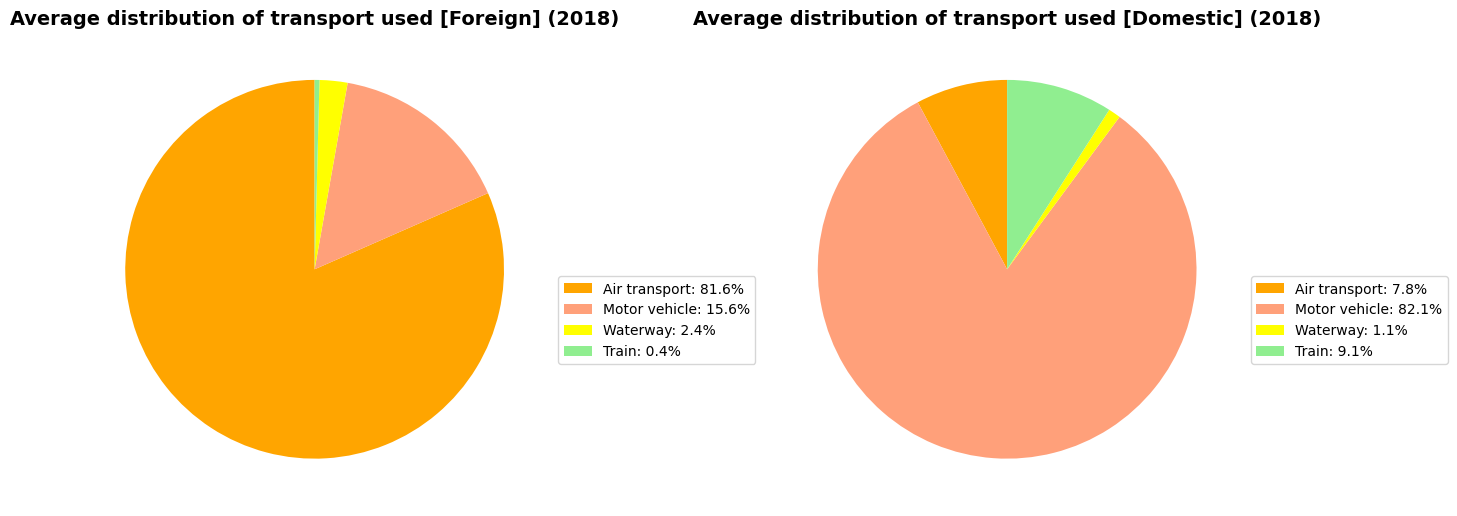

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'transport' DataFrame is already defined and structured as:
# 'Transport method', 'Foreign Tourist arrivals', 'Domestic Tourist arrivals'

# Step 1: Calculate the percentage distribution for Foreign Tourist arrivals
foreign_total = transport['Foreign Tourist arrivals'].sum()
transport['Foreign Percentage'] = (transport['Foreign Tourist arrivals'] / foreign_total) * 100

# Step 2: Calculate the percentage distribution for Domestic Tourist arrivals
domestic_total = transport['Domestic Tourist'].sum()
transport['Domestic Percentage'] = (transport['Domestic Tourist'] / domestic_total) * 100

# Step 3: Define labels (Transport method names)
labels = transport['Transport method']

# Define colors (optional) - Can extend the color list if needed
colors = ['Orange', 'Lightsalmon', 'Yellow', 'Lightgreen']

# Step 4: Create the pie charts
plt.figure(figsize=(14, 7))  # Create figure with subplots

# Pie chart for Foreign Tourist arrivals
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie(transport['Foreign Percentage'], labels=None, colors=colors, autopct=None, startangle=90)
plt.title('Average distribution of transport used [Foreign] (2018)', fontsize=14, fontweight='bold')
plt.legend([f'{label}: {value:.1f}%' for label, value in zip(labels, transport['Foreign Percentage'])], 
           loc="upper left", bbox_to_anchor=(1.0, 0.5))

# Pie chart for Domestic Tourist arrivals
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(transport['Domestic Percentage'], labels=None, colors=colors, autopct=None, startangle=90)
plt.title('Average distribution of transport used [Domestic] (2018)', fontsize=14, fontweight='bold')
plt.legend([f'{label}: {value:.1f}%' for label, value in zip(labels, transport['Domestic Percentage'])], 
           loc="upper left", bbox_to_anchor=(1.0, 0.5))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


As the above pie charts display the average foreign arrival is far more likely to arrive to Spain by air transport, wheras the average domestic tourist will arrive to their destination in Spain by motor vehicle. 

In [82]:
spain_ranking = pd.read_csv('spains-ranking.csv')
spain_ranking.head()

,Year,Number of Tourists (in million),Rank of Spain
0,2000,46.4,3rd
1,2001,48.6,3rd
2,2002,50.3,3rd
3,2003,50.9,3rd
4,2004,52.4,2nd


[]

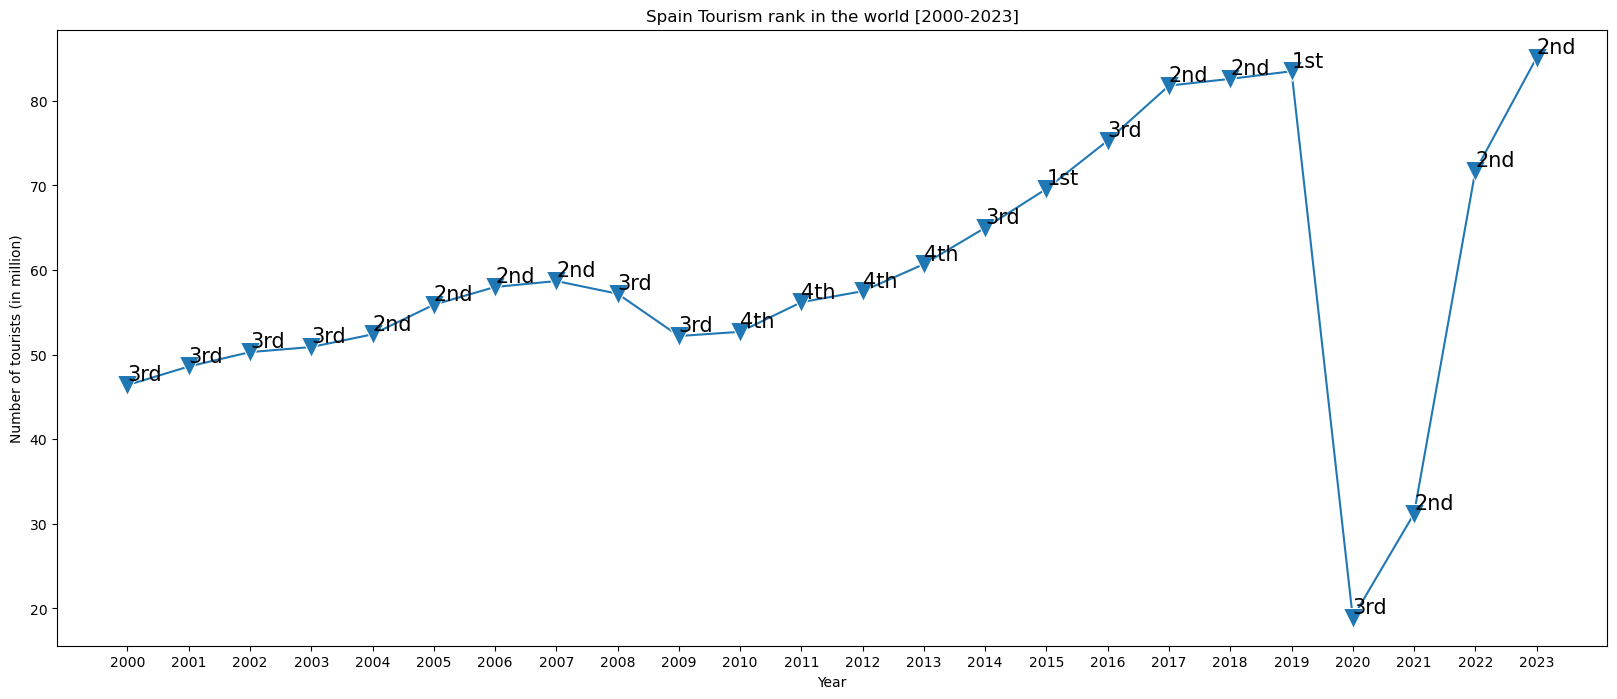

In [84]:
# displaying data on line chart
plt.figure(figsize=(20,8))

# sns.set_context("talk")

g=sns.lineplot(x='Year', y='Number of Tourists (in million)', data=spain_ranking, marker= 'v', markersize=14)
g.set(xlabel="Year",ylabel="Number of tourists (in million)", title="Spain Tourism rank in the world [2000-2023]")
    
plt.xticks(
    range(2000,2024),
    fontweight='light'
)

# label markers with ranks
for x,index in zip(g.get_xticks(),spain_ranking.index):
    g.text(x,spain_ranking._get_value(index,'Number of Tourists (in million)')+0.5, spain_ranking._get_value(index,'Rank of Spain'),size=15)

# display the chart
plt.plot()

From the results of the above line plot, we can see that Spain has always had a high ranking in the worldwide tourism market. Since the early 2000's the country has kept a steady 2nd or 3rd place, but dropped down to 4th between the years of 2010 - 2013, due to the recession in Europe. Spain starts to creep back up again in its ranking by jumping from 3rd place in 2014 straight to 1st in 2015. During the year of 2019, the country managed to gain 1st place again by receiving 83.5 million international arrivals. The following year due to Covid-19 the country only received 18.9 million foreign tourists but still managed to retain 3rd place and moved to 2nd in the years following after. International tourism will always be a very important industry for Spain, as it helps to generate profit for the country and also creates various jobs across the country and helps keep people in employment. 